In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import anndata as an
import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns

## Data Filtering
- Ensure that the data is downloaded (see `../data` for instructions)

In [2]:
data_path = "norman.h5ad"
adata = an.read_h5ad(data_path)
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=True, inplace=True)

Min read count: 1


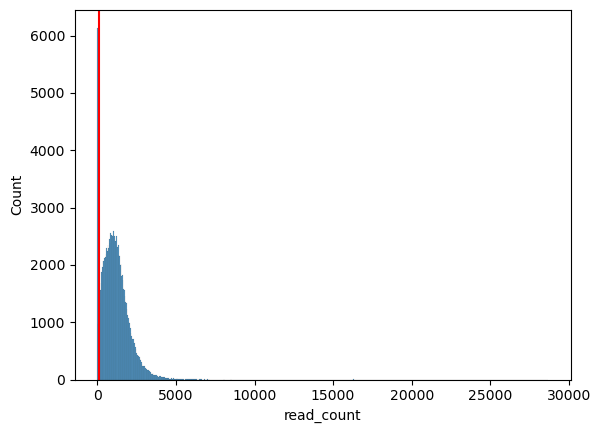

In [23]:
# read_count
read_count_filter = 100
print(f"Min read count: {min(adata.obs['read_count'])}")
sns.histplot(adata.obs["read_count"])
plt.axvline(read_count_filter, 0, 6000, color="red")

Min UMI count: 1


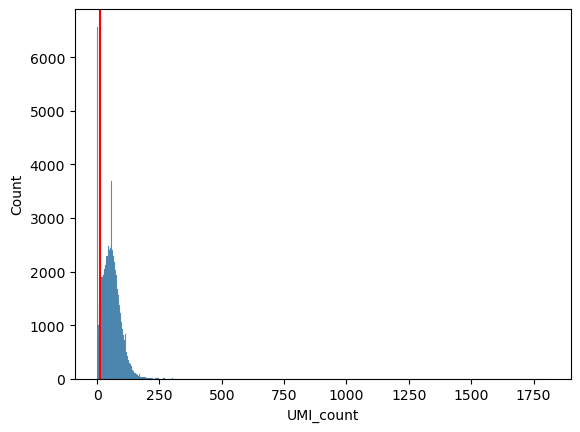

In [18]:
# UMI_count
umi_count_filter = 10
print(f"Min UMI count: {min(adata.obs['UMI_count'])}")
sns.histplot(adata.obs["UMI_count"])
plt.axvline(umi_count_filter, 0, 6000, color="red")

Min total counts: 1633.098876953125


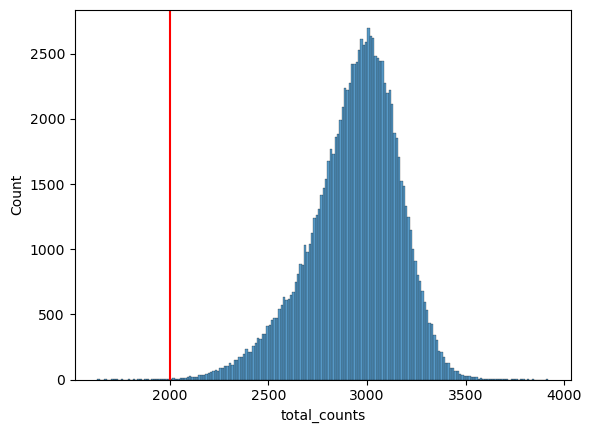

In [20]:
# total_counts
total_count_filter = 2000
print(f"Min total counts: {min(adata.obs['total_counts'])}")
sns.histplot(adata.obs["total_counts"])
plt.axvline(total_count_filter, 0, 6000, color="red")

Min n_genes_by_counts: 974


<Axes: xlabel='n_genes_by_counts', ylabel='Count'>

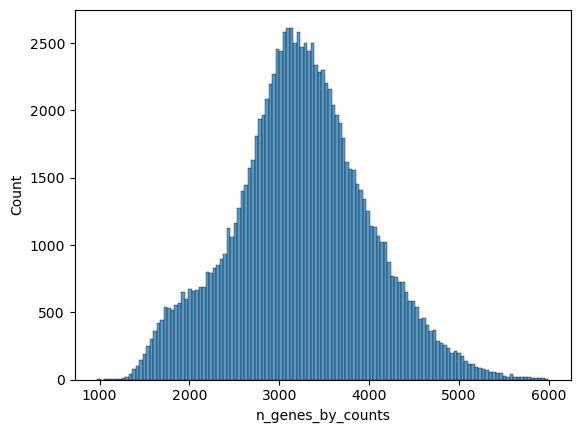

In [21]:
# n_genes_by_counts
print(f"Min n_genes_by_counts: {min(adata.obs['n_genes_by_counts'])}")
sns.histplot(adata.obs["n_genes_by_counts"])

In [10]:
# UMAP projections
sc.pp.neighbors(adata)
sc.tl.umap(adata)

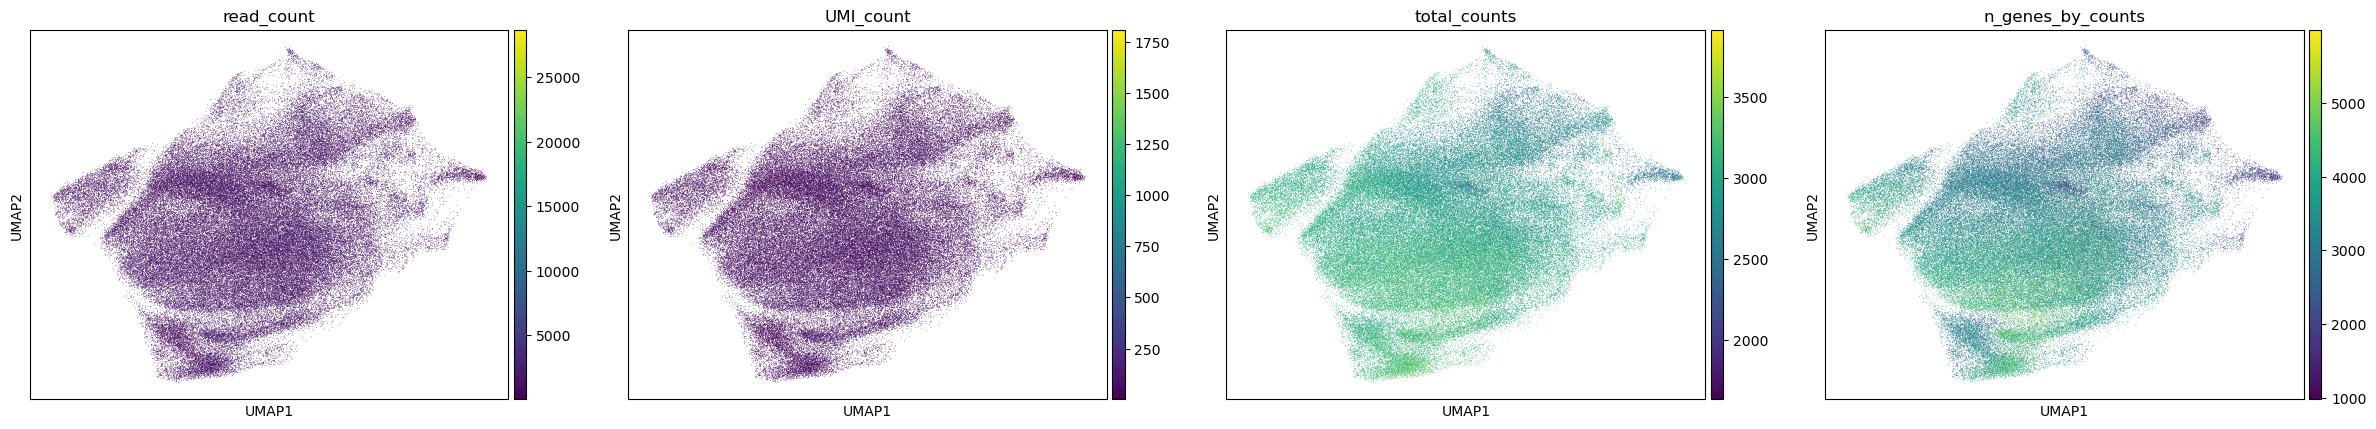

In [11]:
sc.pl.umap(
    adata, color=["read_count", "UMI_count", "total_counts", "n_genes_by_counts"]
)

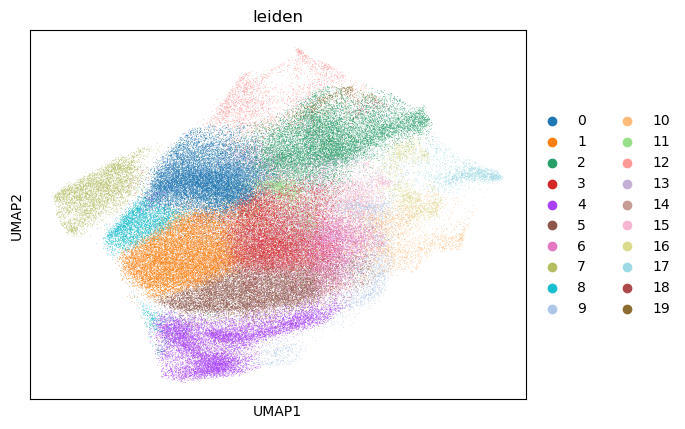

In [14]:
sc.pl.umap(adata, color="leiden")

In [25]:
# filter the anndata and save
filtered_adata = adata[
    (adata.obs["read_count"] >= read_count_filter)
    & (adata.obs["UMI_count"] >= umi_count_filter)
    & (adata.obs["total_counts"] >= total_count_filter)
]
filtered_adata.write("norman_filtered.h5ad")